<a href="https://colab.research.google.com/github/Praneeth5254/DeepLearning/blob/main/Cats_vs_Dogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:55<00:00, 21.5MB/s]
100% 1.06G/1.06G [00:55<00:00, 20.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),

)

#generators
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalizing
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 77ms/step - accuracy: 0.5961 - loss: 0.6952 - val_accuracy: 0.7626 - val_loss: 0.5245
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7579 - loss: 0.4991 - val_accuracy: 0.7788 - val_loss: 0.4751
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8266 - loss: 0.3922 - val_accuracy: 0.7922 - val_loss: 0.4981
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.8763 - loss: 0.2834 - val_accuracy: 0.7706 - val_loss: 0.8024
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.9313 - loss: 0.1680 - val_accuracy: 0.7714 - val_loss: 1.0411
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.9658 - loss: 0.0949 - val_accuracy: 0.7766 - val_loss: 1.1549
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9766 - loss: 0.0658 - val_accuracy: 0.7686 - val_loss: 1.4434
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step - accuracy: 0.9817 - loss: 0.0500 - 

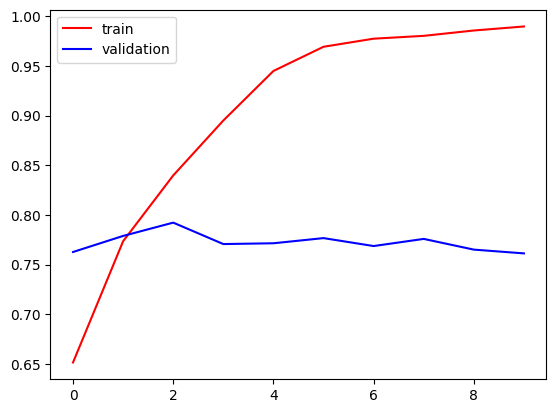

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

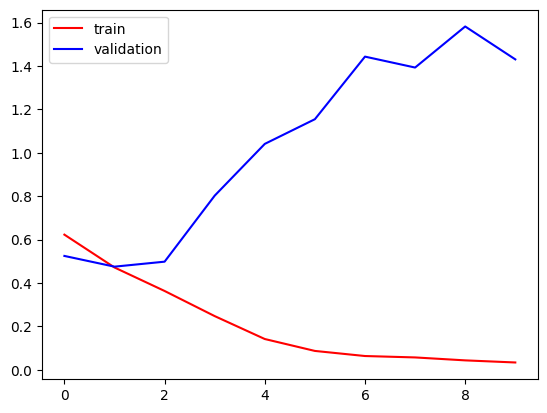

In [12]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

# add more data
# Data Aumentation
#L1/L2 Regularization
#Dropout
#Batch Norm
#Reduce complexity

In [14]:
#Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.5686 - loss: 3.2444 - val_accuracy: 0.6268 - val_loss: 0.6732
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6561 - loss: 0.6271 - val_accuracy: 0.6742 - val_loss: 0.6497
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.7356 - loss: 0.5442 - val_accuracy: 0.6844 - val_loss: 0.6420
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 96ms/step - accuracy: 0.7729 - loss: 0.4780 - val_accuracy: 0.6930 - val_loss: 0.7004
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7992 - loss: 0.4305 - val_accuracy: 0.7650 - val_loss: 0.6444
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.8321 - loss: 0.3858 - val_accuracy: 0.8118 - val_loss: 0.4324
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.8632 - loss: 0.3180 - val_accuracy: 0.8312 - val_loss: 0.4218
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.8988 - loss: 0.2390 - 

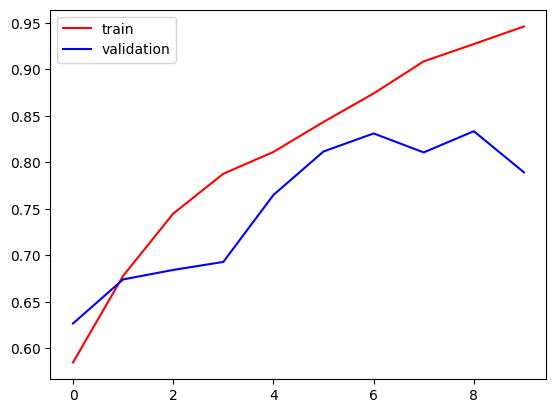

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [19]:
import cv2

In [46]:
test_img = cv2.imread('/content/cat99.jpg')

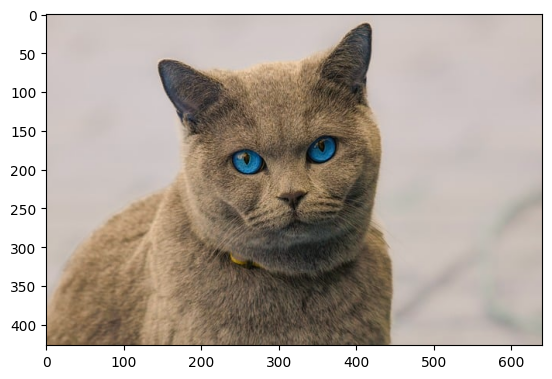

In [47]:
plt.imshow(test_img)

In [48]:
test_img.shape

(427, 640, 3)

In [49]:
test_img = cv2.resize(test_img, (256,256))

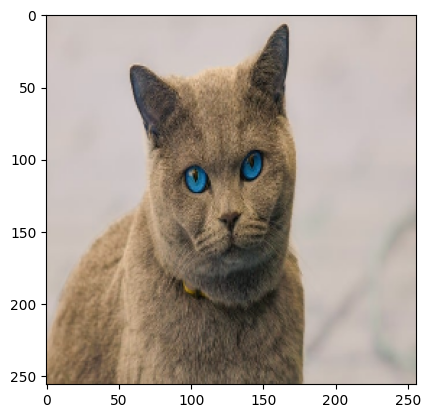

In [50]:
plt.imshow(test_img)

In [51]:
test_input = test_img.reshape((1,256,256,3))

In [52]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.]], dtype=float32)

In [33]:
test_img2 = cv2.imread('/content/dog10006.jpg')

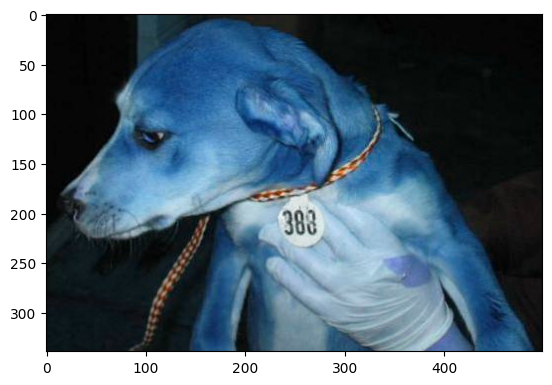

In [34]:
plt.imshow(test_img2)

In [35]:
test_img2.shape

(339, 499, 3)

In [36]:
test_img2 = cv2.resize(test_img2, (256,256))

In [37]:
test_input = test_img2.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
# Cat - 0
# Dog - 1